* Part 1: import libraries and data
* Part 2: EDA
* Part 3: Predict the cause of wildfire
* Part 4: Try to predict if the fire was caused knowingly

**Part 1**

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from subprocess import check_output
conn = sqlite3.connect("DTA.sqlite")
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

The code below is sql connection.

In [5]:
data = pd.read_sql_query("SELECT * FROM 'Fires'", conn)
print(data.head())

   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

The only columns we need are "FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE"

In [6]:
data = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", conn)
print(data.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE  
0       0.10  
1       0.25  
2       0.10  
3       0.10  
4       0.10  


In [7]:
df= data[data.STAT_CAUSE_DESCR != 'Miscellaneous']

In [8]:
df= data[data.STAT_CAUSE_DESCR != 'Miscellaneous']

In [9]:
data = df

In [11]:
data.to_csv(r'C:\Users\Teredesai\fires.csv', index = False)

The most weird part of this dataset is the date format which is in JUILIAN format , its been converted into Georgian so that it is generalized.

In [12]:
data['DATE'] = pd.to_datetime(data['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(data.head()) #check the data

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  
1       0.25 2004-05-12  
2       0.10 2004-05-31  
3       0.10 2004-06-28  
4       0.10 2004-06-28  
5       0.10 2004-06-30  


In [15]:
data['MONTH'] = pd.DatetimeIndex(data['DATE']).month
data['DAY_OF_WEEK'] = data['DATE'].dt.day_name
data_orig = data.copy()
print(data.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH  \
1       0.25 2004-05-12      5   
2       0.10 2004-05-31      5   
3       0.10 2004-06-28      6   
4       0.10 2004-06-28      6   
5       0.10 2004-06-30      6   

                                         DAY_OF_WEEK  
1  <bound method PandasDelegate._add_delegate_acc...  
2  <bound method PandasDelegate._add_delegate_acc...  
3  <bound method PandasDelegate._add_delegate_acc...  
4  <bound method PandasDelegate._add_delegate_acc...  
5  <bound method PandasDelegate._add_delegate_acc..

In [16]:
data.to_csv(r'C:\Users\gurma\Desktop\capstone\Data_mod.csv', index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gurma\\Desktop\\capstone\\Data_mod.csv'

**Part 2**

**Exploratory Data Analysis (EDA):**

Let us first start looking at the cause of fires

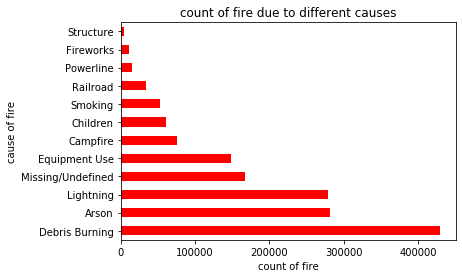

In [17]:
data['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red')
plt.title('count of fire due to different causes')
plt.xlabel('count of fire')
plt.ylabel('cause of fire')

plt.show()

So there are 13 causes of fire to be precise let us see if there is any unique pattern regarding the weekdays the fire is caused.

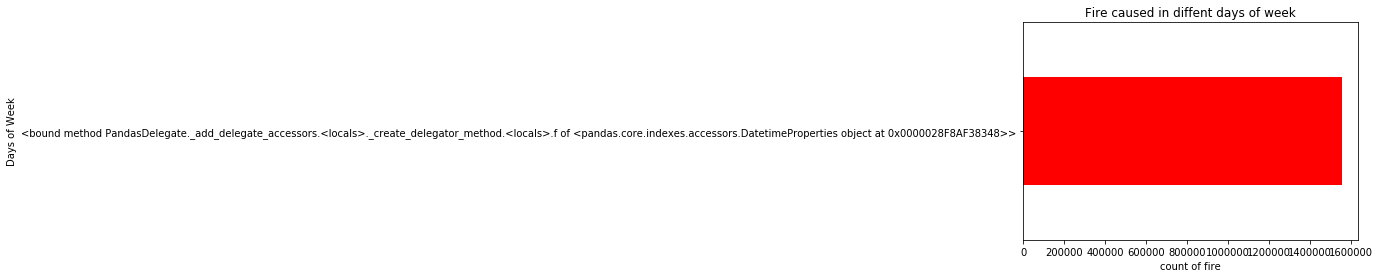

In [18]:
data['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='red')
plt.title('Fire caused in diffent days of week')
plt.xlabel('count of fire')
plt.ylabel('Days of Week')

plt.show()

    All the days of week look almost looks same. Let us see the top caused reason for Fire.

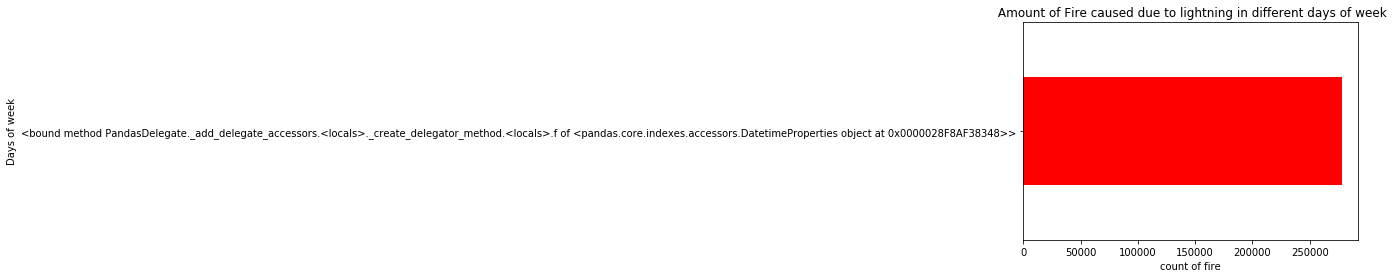

In [19]:
lightning = data[data['STAT_CAUSE_DESCR']=='Lightning']
lightning['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='red')
plt.title(' Amount of Fire caused due to lightning in different days of week')
plt.xlabel('count of fire')
plt.ylabel('Days of week')

plt.show()

    Due to lightning the pattern is different so maybe the increase of fire on weekends could be because of man caused fire.

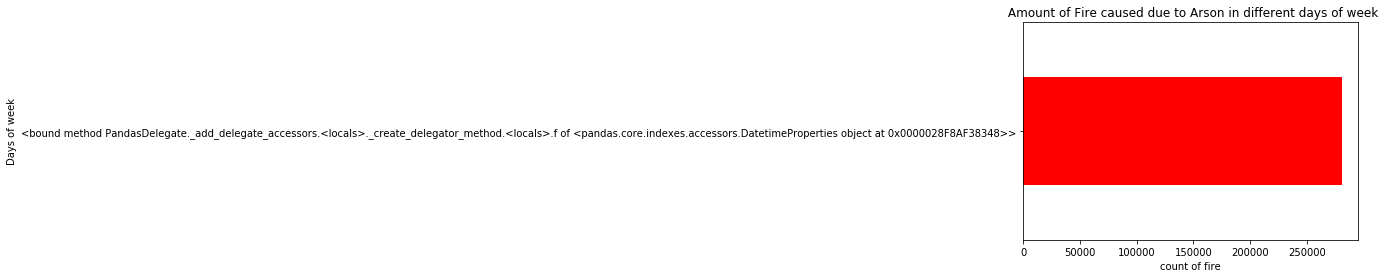

In [20]:
arson = data[data['STAT_CAUSE_DESCR']=='Arson']
arson['DAY_OF_WEEK'].value_counts().plot(kind='barh',color='red')
plt.title(' Amount of Fire caused due to Arson in different days of week')
plt.xlabel('count of fire')
plt.ylabel('Days of week')
plt.show()

The ARSON(MAN CAUSED) fire shows a good information that most of them are on weekend that means it could be because of campfires or similar things.

Let us divide them by states now?

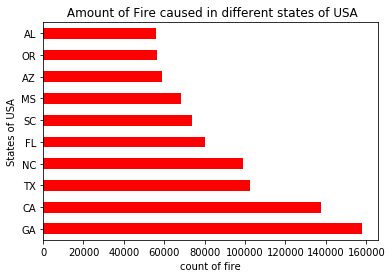

In [21]:
data['STATE'].value_counts().head(n=10).plot(kind='barh',color='red')
plt.title(' Amount of Fire caused in different states of USA')
plt.xlabel('count of fire')
plt.ylabel('States of USA')
plt.show()

plt.show()

Let us norrow down to top 3

In [22]:
CA = data[data['STATE']=='CA']
GA = data[data['STATE']=='GA']
TX = data[data['STATE']=='TX']

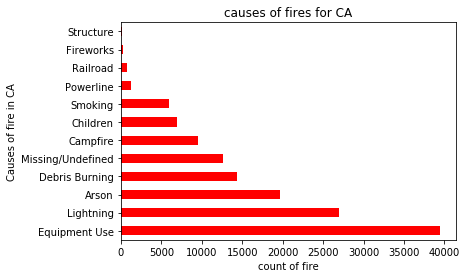

In [23]:
CA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red',title='causes of fires for CA')
plt.xlabel('count of fire')
plt.ylabel('Causes of fire in CA')
plt.show()
plt.show()

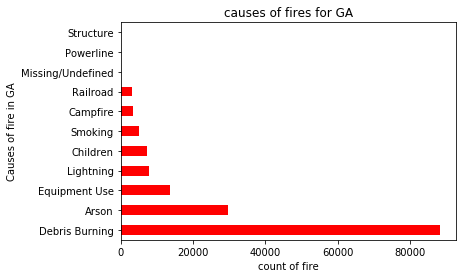

In [24]:
GA['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red',title='causes of fires for GA')
plt.xlabel('count of fire')
plt.ylabel('Causes of fire in GA')
plt.show()
plt.show()

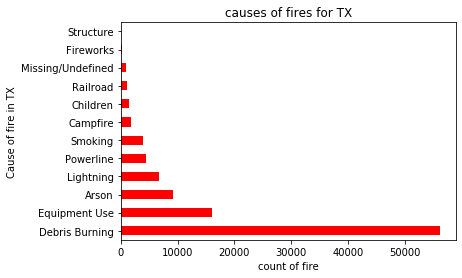

In [25]:
TX['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='red',title='causes of fires for TX')
plt.xlabel('count of fire')
plt.ylabel('Cause of fire in TX')
plt.show()
plt.show()

Let us create a rough map using scatter plot as we have the Latitude and Longitude

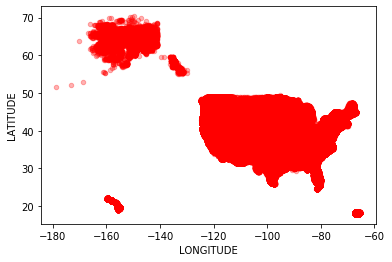

In [26]:
data.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='red',alpha=0.3)
plt.show()

There are lot of categories in this dataset so let us use One Hot Encoding to find the correlation between all these.

In [27]:
le = preprocessing.LabelEncoder()
data['STAT_CAUSE_DESCR'] = le.fit_transform(data['STAT_CAUSE_DESCR'])
data['STATE'] = le.fit_transform(data['STATE'])
data['DAY_OF_WEEK'] = le.fit_transform(data['DAY_OF_WEEK'])
print(data.head())

   FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  \
1       2004                 6  38.933056 -120.404444      4       2453137.5   
2       2004                 3  38.984167 -120.735556      4       2453156.5   
3       2004                 6  38.559167 -119.913333      4       2453184.5   
4       2004                 6  38.559167 -119.933056      4       2453184.5   
5       2004                 6  38.635278 -120.103611      4       2453186.5   

   FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  
1       0.25 2004-05-12      5            0  
2       0.10 2004-05-31      5            0  
3       0.10 2004-06-28      6            0  
4       0.10 2004-06-28      6            0  
5       0.10 2004-06-30      6            0  


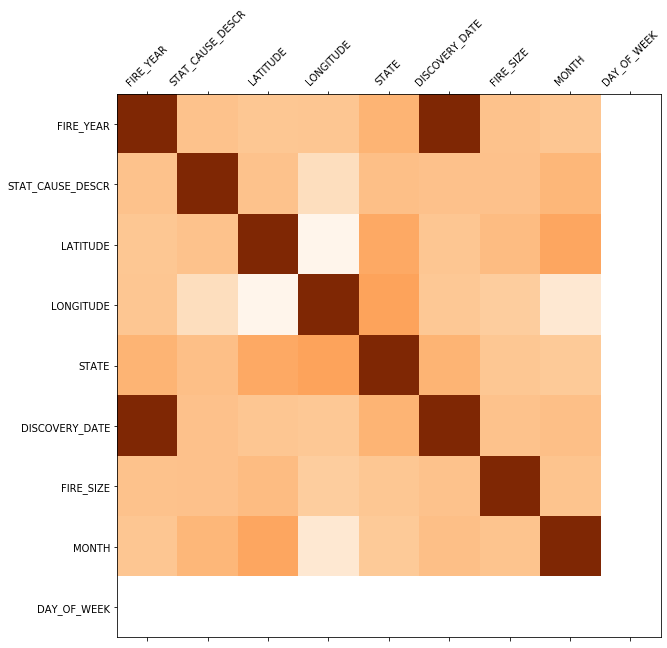

In [28]:
def plot_corr(data,size=10):
    corr = data.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(data)

Good correlation between month and latitude, weather and season are related, less correlation between longitude and month
& No Correlation of Target variable with any

**Part 3**

**Preparing the data for machine learning**

Dropping the Dates and NA's

In [29]:
data = data.drop('DATE',axis=1)
data = data.dropna()

Our Target variable is Cause of Fire(" STAT_CAUSE_DESCR ")

In [30]:
X = data.drop(['STAT_CAUSE_DESCR'], axis=1).values
y = data['STAT_CAUSE_DESCR'].values

Logistic Regression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training

In [32]:
regr = linear_model.LinearRegression()

In [33]:
# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [35]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))

Coefficients: 
 [ 4.32503715e-01 -4.15058895e-02 -3.51292318e-02  1.40865329e-02
 -1.18272734e-03  1.34095273e-05  6.74155882e-02  0.00000000e+00]
Mean squared error: 7.15
Coefficient of determination: 0.04


In [36]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
regr.score(X_train, y_train)

0.040729841612915485

In [38]:
regr.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
regr.score(X_test, y_test)

0.0401465185799037

Decision Tree

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf = tree.DecisionTreeRegressor(max_depth=35)

In [42]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=35, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
clf.score(X_train, y_train)

0.9738494274982985

In [44]:
clf.fit(X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=35, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
clf.score(X_test, y_test)

0.9852615846576924

Random Forest

In [46]:
#clf_rf = ske.RandomForestClassifier(n_estimators=50)
#clf_rf = clf_rf.fit(X_train, y_train)
#print(clf_rf.score(X_test,y_test))

Let us narrow down the classes as there are a lot of classes related to the cause of fire and wich could be tideous while predicting the cause of it.

In [47]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

data['LABEL'] = data_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original data earlier in the kernel
data = data.drop('STAT_CAUSE_DESCR',axis=1)
print(data.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  FIRE_SIZE  MONTH  \
1       2004  38.933056 -120.404444      4       2453137.5       0.25      5   
2       2004  38.984167 -120.735556      4       2453156.5       0.10      5   
3       2004  38.559167 -119.913333      4       2453184.5       0.10      6   
4       2004  38.559167 -119.933056      4       2453184.5       0.10      6   
5       2004  38.635278 -120.103611      4       2453186.5       0.10      6   

   DAY_OF_WEEK  LABEL  
1            0      1  
2            0      2  
3            0      1  
4            0      1  
5            0      1  


Let us try to predict the LABEL now.

In [48]:
X = data.drop(['LABEL'], axis=1).values
y = data['LABEL'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf = clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.7908021019361967


Reducing the Classes did turn out to be a good decision

In [49]:
from sklearn.metrics import confusion_matrix
y_pred = clf_rf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(cm)

[[ 68692  12347   1285   1006]
 [ 10912 217351  18714   2556]
 [  1718  40481  40821   1135]
 [  2332   4632    550  42466]]


Accuracy and Confusion matrix simplified according to Label below

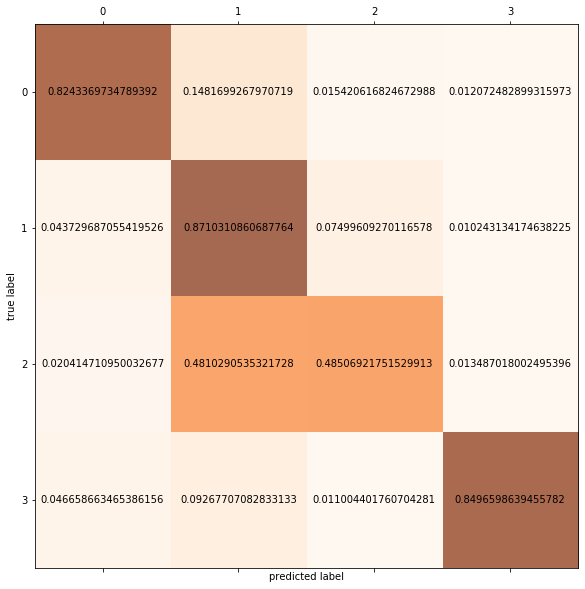

In [50]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(cmn,cmap=plt.cm.Oranges,alpha=0.7)
for i in range(cmn.shape[0]):
    for j in range(cmn.shape[1]):
        ax.text(x=j,y=i,s=cmn[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

**Part 4**

Narrowing down to States

In [51]:
print(CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH  \
1       0.25 2004-05-12      5   
2       0.10 2004-05-31      5   
3       0.10 2004-06-28      6   
4       0.10 2004-06-28      6   
5       0.10 2004-06-30      6   

                                         DAY_OF_WEEK  
1  <bound method PandasDelegate._add_delegate_acc...  
2  <bound method PandasDelegate._add_delegate_acc...  
3  <bound method PandasDelegate._add_delegate_acc...  
4  <bound method PandasDelegate._add_delegate_acc...  
5  <bound method PandasDelegate._add_delegate_acc..

Create a new field: ARSON

In [52]:
def set_arson_label(cause):
    arson = 0
    if cause == 'Arson':
        arson = 1
    return arson
     

CA['ARSON'] = CA['STAT_CAUSE_DESCR'].apply(lambda x: set_arson_label(x)) 
print(CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH  \
1       0.25 2004-05-12      5   
2       0.10 2004-05-31      5   
3       0.10 2004-06-28      6   
4       0.10 2004-06-28      6   
5       0.10 2004-06-30      6   

                                         DAY_OF_WEEK  ARSON  
1  <bound method PandasDelegate._add_delegate_acc...      0  
2  <bound method PandasDelegate._add_delegate_acc...      0  
3  <bound method PandasDelegate._add_delegate_acc...      0  
4  <bound method PandasDelegate._add_delegate_acc...      0  
5  <bound method

C:\Users\Teredesai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We can drop the DATE, STATE, FIRE_SIZE and STAT_CAUSE_DESCR fields and convert the DAY_OF_WEEK to numerical values.

In [53]:
le = preprocessing.LabelEncoder()
CA['DAY_OF_WEEK'] = le.fit_transform(CA['DAY_OF_WEEK'])

print(CA.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   
5       2004        Lightning  38.635278 -120.103611    CA       2453186.5   

   FIRE_SIZE       DATE  MONTH  DAY_OF_WEEK  ARSON  
1       0.25 2004-05-12      5            0      0  
2       0.10 2004-05-31      5            0      0  
3       0.10 2004-06-28      6            0      0  
4       0.10 2004-06-28      6            0      0  
5       0.10 2004-06-30      6            0      0  


C:\Users\Teredesai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# From Here 

In [54]:
data1 = pd.read_sql_query("SELECT STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE FROM 'Fires'", conn)
print(data1.head())
data1_orig = data1.copy()

  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  FIRE_SIZE
0    Miscellaneous  40.036944 -121.005833    CA       0.10
1        Lightning  38.933056 -120.404444    CA       0.25
2   Debris Burning  38.984167 -120.735556    CA       0.10
3        Lightning  38.559167 -119.913333    CA       0.10
4        Lightning  38.559167 -119.933056    CA       0.10


In [55]:
def set_label(cat):
    cause = 0
    natural = ['Lightning']
    accidental = ['Structure','Fireworks','Powerline','Railroad','Smoking','Children','Campfire','Equipment Use','Debris Burning']
    malicious = ['Arson']
    other = ['Missing/Undefined','Miscellaneous']
    if cat in natural:
        cause = 1
    elif cat in accidental:
        cause = 2
    elif cat in malicious:
        cause = 3
    else:
        cause = 4
    return cause
     

data1['LABEL'] = data1_orig['STAT_CAUSE_DESCR'].apply(lambda x: set_label(x)) # I created a copy of the original data earlier in the kernel
data1 = data1.drop('STAT_CAUSE_DESCR',axis=1)
print(data.head())

   FIRE_YEAR   LATITUDE   LONGITUDE  STATE  DISCOVERY_DATE  FIRE_SIZE  MONTH  \
1       2004  38.933056 -120.404444      4       2453137.5       0.25      5   
2       2004  38.984167 -120.735556      4       2453156.5       0.10      5   
3       2004  38.559167 -119.913333      4       2453184.5       0.10      6   
4       2004  38.559167 -119.933056      4       2453184.5       0.10      6   
5       2004  38.635278 -120.103611      4       2453186.5       0.10      6   

   DAY_OF_WEEK  LABEL  
1            0      1  
2            0      2  
3            0      1  
4            0      1  
5            0      1  


In [56]:
le = preprocessing.LabelEncoder()
data1['STATE'] = le.fit_transform(data1['STATE'])

print(data1.head())

    LATITUDE   LONGITUDE  STATE  FIRE_SIZE  LABEL
0  40.036944 -121.005833      4       0.10      4
1  38.933056 -120.404444      4       0.25      1
2  38.984167 -120.735556      4       0.10      2
3  38.559167 -119.913333      4       0.10      1
4  38.559167 -119.933056      4       0.10      1


In [57]:


X = data1.drop(['LABEL'], axis=1).values
y = data1['LABEL'].values
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=6,
                                learning_rate=0.9,
                                n_estimators=300,
                                subsample=0.6,
                                random_state=0)
gbr.fit(X_train,y_train)

print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))


0.5600565132731914
0.5513800383466495


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0) #30% for testing, 70% for training

#Library for XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error







C:\Users\Teredesai\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
#CREATING THE MATRIX
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Adjusting Parameters
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

#Fitting the data
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


#setting up RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#Parameters
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

[13:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.207242


In [61]:
#Fitting the data
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)


#setting up RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#Parameters
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

[13:16:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1.207242


In [62]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

#Checking the results
cv_results.head()

                    
#Looking at final scores
print((cv_results["test-rmse-mean"]).tail(1))
                    

                    
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[13:17:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
49    0.932991
Name: test-rmse-mean, dtype: float64
[13:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


We can now test the ML:

Summary:
Given some basic data, the kind of data available when a fire is first discovered, it is possible to predict with some accuracy if the firs wa the result of arson.

In [63]:
#Looking at final scores
print((cv_results["test-rmse-mean"]).tail(1))

49    0.932991
Name: test-rmse-mean, dtype: float64


In [64]:
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          2.091084        0.000414        2.090922       0.000926
1          1.929733        0.003143        1.929702       0.002218
2          1.790661        0.002883        1.790736       0.002230
3          1.666153        0.001726        1.666100       0.000495
4          1.556495        0.001308        1.556440       0.000143
5          1.464582        0.001483        1.464541       0.002201
6          1.383399        0.001469        1.383397       0.000352
7          1.311887        0.001032        1.311901       0.000033
8          1.253454        0.001862        1.253484       0.001865
9          1.201420        0.001721        1.201448       0.001553
10         1.156954        0.001531        1.157019       0.001508
11         1.119650        0.001493        1.119722       0.001313
12         1.088563        0.001518        1.088619       0.001273
13         1.063824        0.001027        1.063922       0.00

In [66]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,0.933853,0.000979,0.934187,0.000659
46,0.933726,0.000942,0.934076,0.000625
47,0.933304,0.000697,0.933659,0.000367
48,0.932932,0.000763,0.933295,0.000481
49,0.932631,0.000803,0.932991,0.000480


### MPL CLASSIFIER

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
from sklearn.neural_network import MLPClassifier

In [79]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [80]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [81]:
predictions = mlp.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(confusion_matrix(y_test,predictions))

[[ 55723  21567    579   5447]
 [ 22636 190729  11925  24038]
 [  2984  52603  16485  12098]
 [ 14987  72725   7265  52349]]


In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.58      0.67      0.62     83316
           2       0.56      0.76      0.65    249328
           3       0.45      0.20      0.27     84170
           4       0.56      0.36      0.43    147326

    accuracy                           0.56    564140
   macro avg       0.54      0.50      0.49    564140
weighted avg       0.55      0.56      0.53    564140



Letting NLP work AGAIN with different Layers 

In [90]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13,2,1,3),max_iter=500)

In [91]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13, 2, 1, 3),
              learning_rate='constant', learning_rate_init=0.001, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [92]:
predictions = mlp.predict(X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(confusion_matrix(y_test,predictions))

[[ 66627  13528      0   3161]
 [ 57913 175128      0  16287]
 [ 10704  64436      0   9030]
 [ 48178  59799      0  39349]]


In [95]:
print(classification_report(y_test,predictions))

C:\Users\Teredesai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.36      0.80      0.50     83316
           2       0.56      0.70      0.62    249328
           3       0.00      0.00      0.00     84170
           4       0.58      0.27      0.37    147326

    accuracy                           0.50    564140
   macro avg       0.38      0.44      0.37    564140
weighted avg       0.45      0.50      0.44    564140



### MLP REGRESSOR

In [109]:
from sklearn.pipeline import make_pipeline
from time import time
from sklearn.preprocessing import QuantileTransformer

In [112]:
print("Training MLPRegressor...")
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))

Training MLPRegressor...
Test R2 score: 0.24
